# Problem 15.8

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 15**

**Problem 15.8**


**Consider the transmittance of the coverglass (whose tabulated data is provided in the online repository of this book). Neglecting any optical losses at the interface between the coverglass adhesive and the solar cell, what would be the short-circuit current generated by every subcell in Problem S15.7 under that coverglass? What would be the impact on the top/mid subcell current balance?** 

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data for the solar spectra.

In [2]:
datafile = pd.read_csv('data/Reference_spectrum_ASTM-G173-03.csv', index_col=0, header=0) 
datafile

,AM0,AM1.5G,AM1.5D
Wvlgth nm,Etr W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
280,8.20E-02,4.73E-23,2.54E-26
280.5,9.90E-02,1.23E-21,1.09E-24
281,1.50E-01,5.69E-21,6.13E-24
281.5,2.12E-01,1.57E-19,2.75E-22
...,...,...,...
3980,8.84E-03,7.39E-03,7.40E-03
3985,8.80E-03,7.43E-03,7.45E-03
3990,8.78E-03,7.37E-03,7.39E-03
3995,8.70E-03,7.21E-03,7.23E-03


In [3]:
datafile.drop(datafile.index[0], inplace=True)   #remove row including information on units
datafile=datafile.astype(float)                  #convert values to float for easy operation
datafile.index=datafile.index.astype(float)      #convert indexes to float for easy operation

We can also plot the three spectra

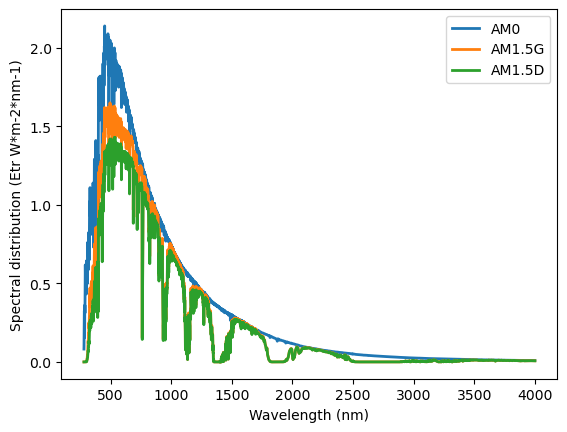

In [4]:
plt.plot(datafile, 
         linewidth=2, label=datafile.columns)
plt.ylabel('Spectral distribution (Etr W*m-2*nm-1)')
plt.xlabel('Wavelength (nm)')
plt.legend()

We define the relevant constants and import the QE of the triple junction solar cell.

In [5]:
h=6.63*10**(-34)   # [J·s] Planck constant
e=1.60*10**(-19)   # [C] electron charge
c =299792458       #[m/s] Light speed

In [6]:
QE_top = pd.read_csv('data/EQE_TC_BOL.txt', 
                     header=None, index_col=0, sep='\t').dropna().squeeze() #import dataframe and convert into series
QE_mid = pd.read_csv('data/EQE_MC_BOL.txt', 
                     header=None, index_col=0, sep='\t').squeeze() #import dataframe and convert into series 
QE_bot = pd.read_csv('data/EQE_BC_BOL.txt', 
                     header=None, index_col=0, sep='\t').squeeze() #import dataframe and convert into series 

We can plot the Quantum Efficiency.

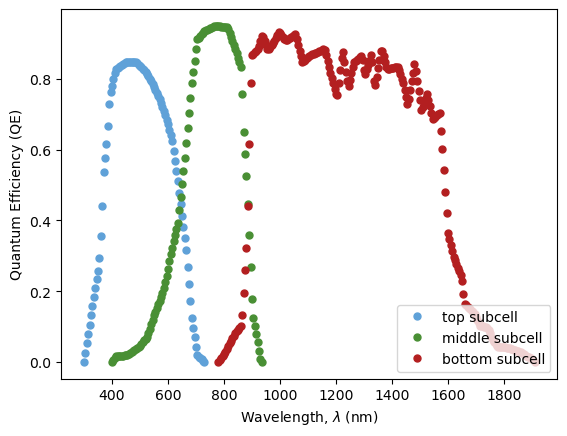

In [7]:
plt.plot(QE_top, linewidth=0, label='top subcell', marker='.', markersize=10, color='#5FA1D8') #ligthblue
plt.plot(QE_mid, linewidth=0, label='middle subcell', marker='.', markersize=10, color='#498F34') #green
plt.plot(QE_bot, linewidth=0, label='bottom subcell', marker='.', markersize=10, color='#B31F20') #darkred
plt.ylabel('Quantum Efficiency (QE)')
plt.xlabel('Wavelength, $\lambda$ (nm)');
plt.legend(loc='lower right')

We import the transmisttance of the coverglass and plot it. 

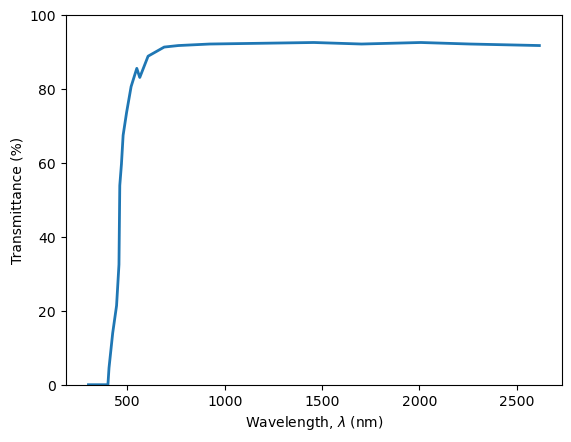

In [8]:
T_coverglass = pd.read_csv('data/TransmissionCoverGlass_BOL.txt', 
                     header=None, index_col=0, sep='\t').dropna().squeeze() #import dataframe and convert into serie
plt.plot(100*T_coverglass, linewidth=2)
plt.ylabel('Transmittance (%)')
plt.ylim([0,100])
plt.xlabel('Wavelength, $\lambda$ (nm)');

For the top subcell, we calculate the spectral response, interpolate the spectrum, and integrate to obtain the short-circuit current density.

$J=\int SR(\lambda) \cdot G(\lambda) \cdot T_{coverglass}(\lambda)  \ d\lambda$

In this case, we assume the extraterrestrial irradiance AM0 and multiply it by the transmittance of the coverglass.

In [9]:
QE=QE_top
SR=pd.Series(index=QE.index,
            data=[QE.loc[i]*e*i*0.000000001/(h*c) for i in QE.index])

spectrum='AM0'
spectra=datafile[spectrum]
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)
T_coverglass_interpolated=np.interp(SR.index, T_coverglass.index, T_coverglass.values)
J_top = np.trapz([x*y*z for x,y,z in zip(SR, spectra_interpolated,T_coverglass_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density top = ' + str(J_top.round(1)) + ' mA/cm2')

Photocurrent density top = 10.5 mA/cm2


We repeat the analysis for the middle subcell.

In [10]:
QE=QE_mid
SR=pd.Series(index=QE.index,
            data=[QE.loc[i]*e*i*0.000000001/(h*c) for i in QE.index])

spectra=datafile[spectrum]
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)
T_coverglass_interpolated=np.interp(SR.index, T_coverglass.index, T_coverglass.values)
J_mid = np.trapz([x*y*z for x,y,z in zip(SR, spectra_interpolated,T_coverglass_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density middle = ' + str(J_mid.round(1)) + ' mA/cm2')

Photocurrent density middle = 16.5 mA/cm2


We repeat the analysis for the bottom subcell.

In [11]:
QE=QE_bot
SR=pd.Series(index=QE.index,
            data=[QE.loc[i]*e*i*0.000000001/(h*c) for i in QE.index])

spectra=datafile[spectrum]
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)
T_coverglass_interpolated=np.interp(SR.index, T_coverglass.index, T_coverglass.values)
J_bot = np.trapz([x*y*z for x,y,z in zip(SR, spectra_interpolated,T_coverglass_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2

print('Photocurrent density bottom = ' + str(J_bot.round(1)) + ' mA/cm2')

Photocurrent density bottom = 27.4 mA/cm2


In this case, the top subcell determines the current flowing throughout the device since it is the subcell that generates the lowest current. The current balance of the top and middle subcells ($J_{SC,top}$/$J_{SC,middle}$) can be calculated as follows:

In [12]:
J_top/J_mid

0.6354648479588848

**What is the impact on the top/mid subcell current balance?**

The coverglass absorption in the UV limits, even more, the current photogenerated by the top subcell exacerbating the current unbalance.